In [3]:
#importing the necessary libraries

import os
import numpy as np
import random
import cv2

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import GlobalAveragePooling2D

In [5]:
#Preprocessing the images

def preprocess_image(image_path, target_size=(224,224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    return image

In [6]:
#Loading the images from the directory

def load_data(directory):
    images = []
    labels = []
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    image = preprocess_image(file_path)
                    images.append(image)
                    labels.append(folder) 
    return np.array(images), np.array(labels)

In [8]:
data_directory = 'ALL dataset'

images, labels = load_data(data_directory)

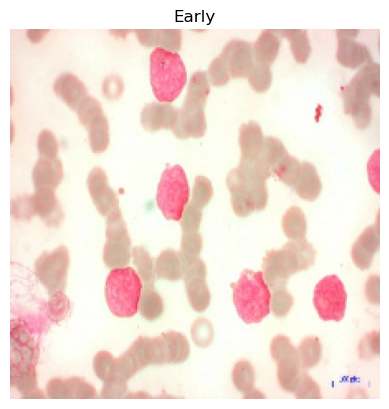

In [10]:
import cv2
img2="ALL dataset/early/WBC-Malignant-Early-001.jpg"
i2=cv2.imread(img2)
plt.title("Early")
plt.axis("off")
plt.imshow(i2)
plt.show()

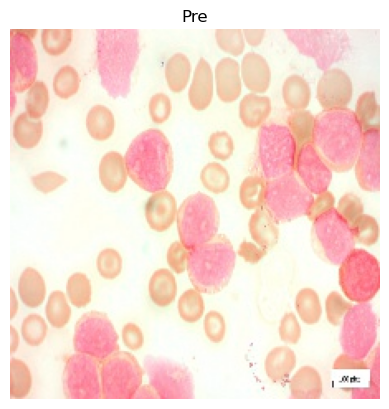

In [11]:
import cv2
img3="ALL dataset/Pre/WBC-Malignant-Pre-011.jpg"
i3=cv2.imread(img3)
plt.title("Pre")
plt.axis("off")
plt.imshow(i3)
plt.show()

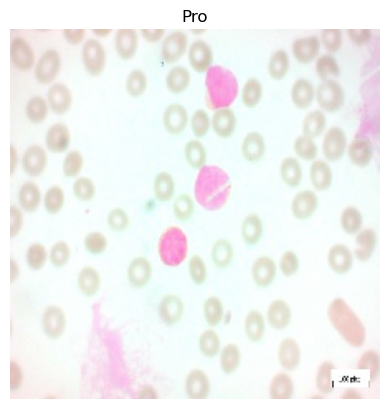

In [12]:
import cv2
img4="ALL dataset/Pro/WBC-Malignant-Pro-021.jpg"
i4=cv2.imread(img4)
plt.title("Pro")
plt.axis("off")
plt.imshow(i4)
plt.show()

In [13]:

d1="ALL dataset/Benign"
d2="ALL dataset/Early"
d3="ALL dataset/Pre"
d4="ALL dataset/Pro"

j=1

for file in os.listdir(d1):
                file_path = os.path.join(d1, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    j+=1
print(j)

k=1

for file in os.listdir(d2):
                file_path = os.path.join(d2, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    k+=1
print(k)
                    
l=1

for file in os.listdir(d3):
                file_path = os.path.join(d3, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    l+=1
print(l)

m=1

for file in os.listdir(d4):
                file_path = os.path.join(d4, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    m+=1
print(m)


958
986
964
805


In [14]:
categories=set(labels)
categories

categories=list(categories)
categories

['Benign', 'Pro', 'Early', 'Pre']

In [15]:
freq=[j,k,l,m]

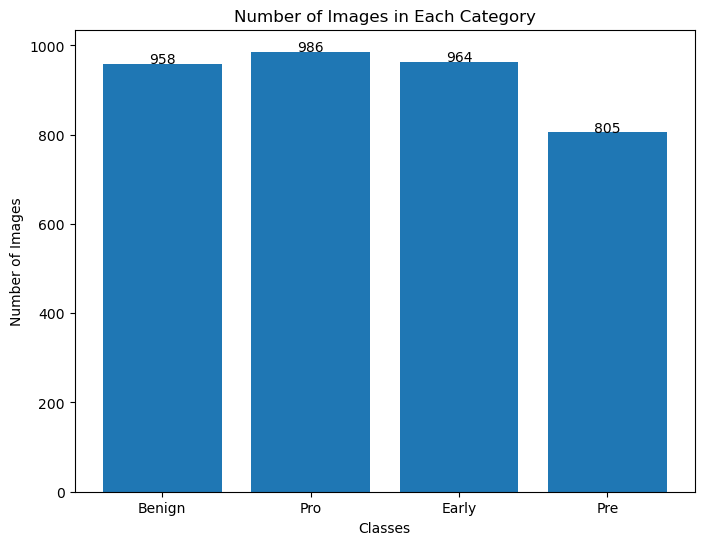

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(categories, freq)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')

plt.savefig("Distribution of images.pdf")

for i in range(len(categories)):
    plt.text(categories[i], freq[i] + 1, str(freq[i]), ha='center')
    
plt.show()


In [17]:
from sklearn.utils import shuffle
shuffle_X,shuffle_y=shuffle(images,labels,random_state=0)

In [18]:
shuffle_y

array(['Early', 'Benign', 'Benign', ..., 'Early', 'Pre', 'Pre'],
      dtype='<U6')

In [19]:

X_train, X_test, y_train, y_test = train_test_split(shuffle_X, shuffle_y, test_size=0.2, random_state=42)

In [20]:
#Normalization 

X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(2967, 224, 224, 3)
(742, 224, 224, 3)
(2967,)
(742,)


In [22]:
num_classes = len(np.unique(labels))
num_classes

4

In [23]:
#Converting the labels from string to integer

from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

set(y_train_encoded)


{0, 1, 2, 3}

In [24]:
num_classes = len(np.unique(labels))
num_classes

4

In [25]:
#Creating the CNN architecture

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))


model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()



C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 787,268 (3.00 MB)

 Trainable params: 787,268 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history=model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 58s 589ms/step - accuracy: 0.3343 - loss: 1.2854 - val_accuracy: 0.5202 - val_loss: 0.9822
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 54s 581ms/step - accuracy: 0.6596 - loss: 0.6735 - val_accuracy: 0.8302 - val_loss: 0.4106
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 54s 580ms/step - accuracy: 0.8354 - loss: 0.4069 - val_accuracy: 0.8827 - val_loss: 0.3778
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 58s 624ms/step - accuracy: 0.8878 - loss: 0.2986 - val_accuracy: 0.8854 - val_loss: 0.2728
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 600ms/step - accuracy: 0.9001 - loss: 0.2480 - val_accuracy: 0.8841 - val_loss: 0.3204
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 57s 608ms/step - accuracy: 0.9220 - loss: 0.2245 - val_accuracy: 0.9070 - val_loss: 0.2464
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 606ms/step - accuracy: 0.9258 - loss: 0.2002 - val_accuracy: 0.9461 - val_loss: 0.1586
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 56s 600ms/step - accuracy: 0.9464 - loss: 0.1575 - val_accu

In [28]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9903 - loss: 0.0534
Test Loss: 0.04812764376401901, Test Accuracy: 0.993261456489563


In [35]:
model.save("cnn10 augmentation FINAL.h5")

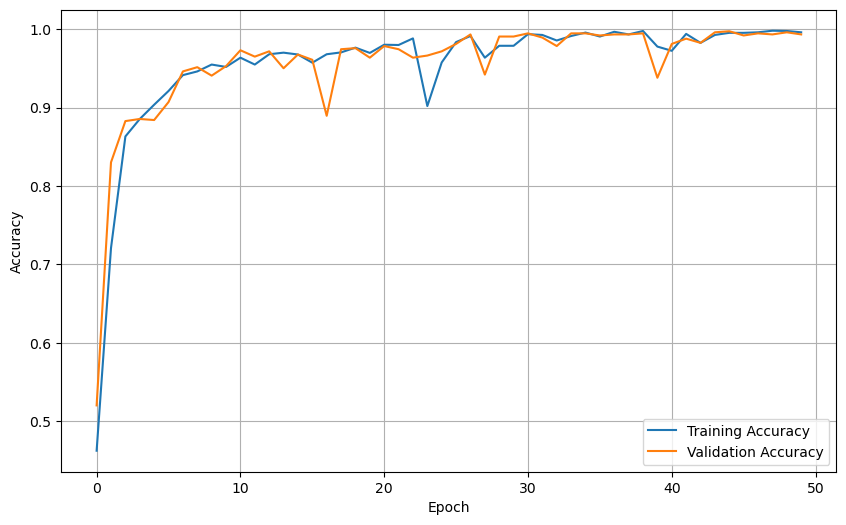

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("augmentation acc vs epoch.pdf")
plt.show()

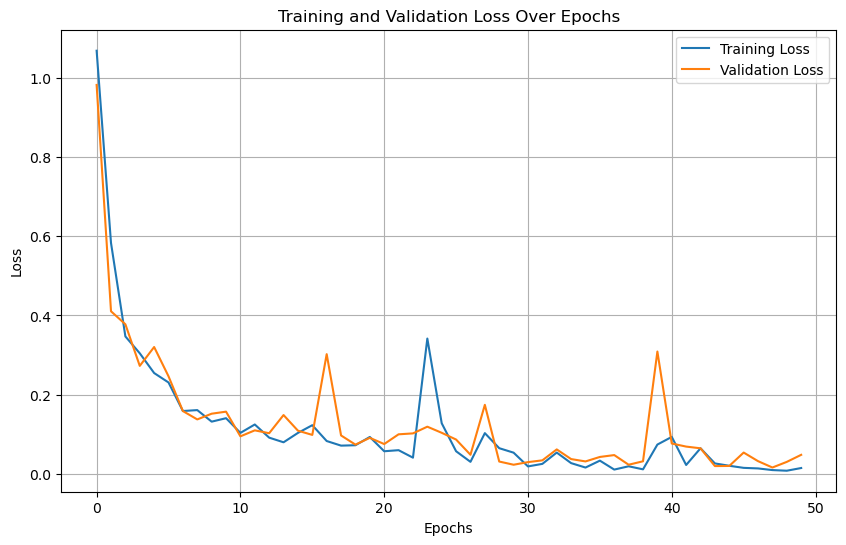

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("augmentation loss vs epoch.pdf")
plt.grid(True)

plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np


# Make predictions on the training and testing sets
train_predictions = np.argmax(model.predict(X_train), axis=-1)
test_predictions = np.argmax(model.predict(X_test), axis=-1)

# Use LabelEncoder to convert class labels back to original format
le = LabelEncoder()
y_train_labels = le.fit_transform(y_train)
y_test_labels = le.transform(y_test)

# Generate classification reports
train_classification_report = classification_report(y_train_labels, train_predictions)
test_classification_report = classification_report(y_test_labels, test_predictions)

# Obtain training and testing accuracy from the training history
training_accuracy = history.history['accuracy'][-1]
testing_accuracy = history.history['val_accuracy'][-1]

# Print or display the results
print("Training Classification Report:\n", train_classification_report)
print("\nTesting Classification Report:\n", test_classification_report)
print("\nTraining Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       784
           2       1.00      0.99      0.99       781
           3       0.99      1.00      0.99       653

    accuracy                           1.00      2967
   macro avg       1.00      1.00      1.00      2967
weighted avg       1.00      1.00      1.00      2967


Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       0.98      1.00      0.99       201
           2       1.00      0.98      0.99       182
           3       0.99      1.00      1.00       151

    accuracy                           0.99       742
   macro avg       0.99      0.99      0.99       742
weighted avg       0.99      0.99   

In [33]:
y_pred=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step


In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred_labels)


print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[207   1   0   0]
 [  0 201   0   0]
 [  0   3 178   1]
 [  0   0   0 151]]
